# <span style="color:teal;">Task 8: Clustering with K-Means</span>
* Objective: Perform unsupervised learning with K-Means clustering.  
* Tools: Scikit-learn, Pandas, Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Matplotlib is building the font cache; this may take a moment.


**Step 1 : Load the data**

In [3]:
df = pd.read_csv("Mall_Customers.csv")
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Step 2 : Data preprocessing**
* Drop CustomerID (not useful for clustering)
* Encode Gender column (Male/Female to 0/1)

In [6]:
df_cluster = df.drop("CustomerID", axis=1).copy()

In [7]:
le = LabelEncoder()
df_cluster['Gender'] = le.fit_transform(df_cluster['Gender'])
df_cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


**Step 3: PCA for 2D visualization**

In [8]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(df_cluster)

**Step 4: Elbow Method to determine optimal K**
* Plot Elbow Curve

In [11]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

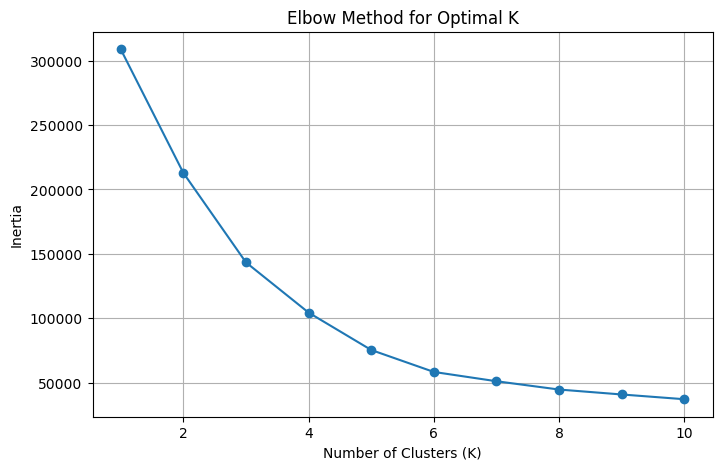

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

**Step 5: Fit final KMeans model with chosen K (e.g., K=5)**

In [13]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_cluster)

**Step 6: Evaluate using Silhouette Score**

In [14]:
sil_score = silhouette_score(df_cluster, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.44


**Step 7: Visualize Clusters (2D with PCA)**

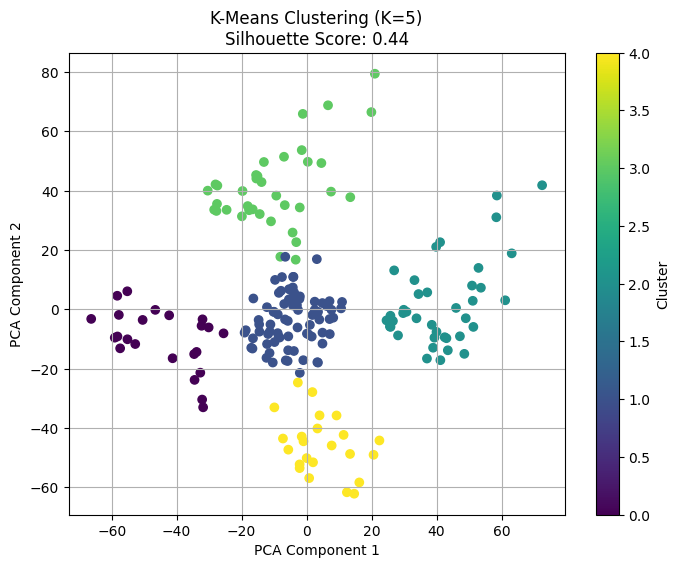

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f"K-Means Clustering (K={optimal_k})\nSilhouette Score: {sil_score:.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()